# Solving the 0/1 knapsack problem using Dynamic Programming

Dynamic Programming can be used to solve the 0/1 knapsack problem. The following recursive definition can be given, where $i$ is the last item in the items list and $K$ is the maximum capacity (maximum weight) a knapsack (rucksack) can carry:

$value(i,k)=\begin{cases}
    0, & \text{if $i=0$}.\\
    value(i-1,k), & \text{if $i>0 \land w[i]>k$}.\\
    max(value(i-1,k), value(i-1,k-w[i]) + v[i]), & \text{otherwise}.
  \end{cases}$
  
Looking at the $0^{th}$ item, the value that can be carried by the knapsack is 0, since there aren't any items available.
If there is an item available, but it does not fit in the knapsack, the value achievable equals the value of the same problem but without this particular item at all. Since there is technically no difference for the outcome between an item that does not fit and an item that does not exist at all. Thus the same problem with $i-1$ can be returned as the solution.
If the item fits in the backpack a decision has to be made. One possibility is to take this item into the knapsack. In that case the maximum value would be the sum of the value of this item and the maximum value obtainable with a smaller knapsack whose size is the remaining space of the original backpack after adding this new item (space of the rest-knapsack). The other possibility is to not take this item. In that case the obtainable value does again equal the value as if this item did not exist, so $value(i-1,k)$. The max function chooses between this two options and picks the one with the higher value.

Without Dynamic Programming this would lead us into an exponential time algorithm. $k$ can be treated as a constant and $i$ as the problem size. To calculate the value of a problem of size $i$ up to two times (in the otherwise case) the value of a problem of size $i-1$ has to be calculated. That means the time to calculate the solution can double with each increment of $i$, what leads to an exponential time complexity. Thanks to Dynamic Programming this can be sped up. Instead of recalculating the same problem over and over again, a calculated solution gets stored in a dictionary with a 2-tuple of the parameters as key. Now instead of having to calculate the solution of the problem again, we can look up the value from the dictionary, what just takes a $\mathcal{O}(1)$. Since every value just has to be calculated once the time it takes to calculate the solution of the whole problem is the product of the amount of subproblems and the time per problem. The amount of subproblems is at most the amount of possible tuples with the values $(1...n,0...K)$, thus it is $\mathcal{O}(nK)$. The runtime of the problem is $\mathcal{O}(nK) \cdot \mathcal{O}(1) = \mathcal{O}(nK)$.

In [32]:
K = 120 #Maximum capacity

items = [(13, 19), (11, 20), (17, 23), (15, 21), (16, 27), (14, 25), (18, 25), 
         (10, 18), (19, 24), (12, 17)] #list of weight, value pairs of all items

n = len(items) - 1 #index of last items

weights = []
values = []

calls = 0 #global variable to count function calls

for item in items:
    weights.append(item[0])
    values.append(item[1])


#memoize decorator
def memoize(f):
    memo = {}
    
    def helper(i, k):
        if (i, k) not in memo:
            memo[(i, k)] = f(i, k)
        return memo[(i, k)]
    
    return helper


@memoize
def value_memo(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value_memo(i - 1, k)
    return max(value_memo(i - 1, k), value_memo(i - 1, k - weights[i]) + values[i])


def value(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value(i - 1, k)
    return max(value(i - 1, k), value(i - 1, k - weights[i]) + values[i])


print('With memoization:')
print('Result: ' + str(value_memo(n, K)))
print('Function calls: ' + str(calls))
calls = 0
print()
print('Without memoization:')
print('Result: ' + str(value(n, K)))
print('Function calls: ' + str(calls))


With memoization:
Result: 183
Function calls: 502

Without memoization:
Result: 183
Function calls: 2026


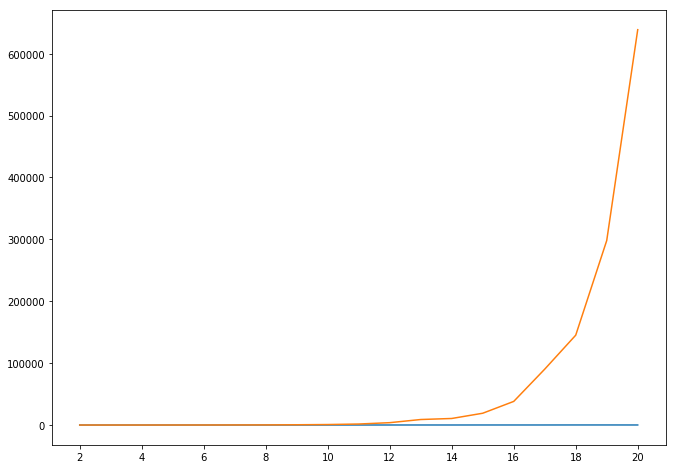

In [33]:
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np


def rand_items(n):
    items = []
    for i in range(0, n):
        items.append((rnd.randint(1, 100), rnd.randint(1, 100)))
    return items


calls_with_memo = []
calls_without_memo = []

for i in range(2, 21):
    calls1 = 0
    calls2 = 0
    
    for j in range(0, 5):
        K = 20 * i
        items = rand_items(i)
        n = len(items) - 1
        global weights
        weights = []
        global values
        values = []
        global calls
        calls = 0
        for item in items:
            weights.append(item[0])
            values.append(item[1])
        value_memo(n, K)
        calls1 += calls
        calls = 0
        value(n, K)
        calls2 += calls
        calls = 0
    calls_with_memo.append(calls1 / 5)
    calls_without_memo.append(calls2 / 5)
    
   
   
x = np.arange(2, 21)
y1 = np.asarray(calls_with_memo)
y2 = np.asarray(calls_without_memo)
    
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()